C:\Users\ferdo\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ValueError: Format 'gif' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

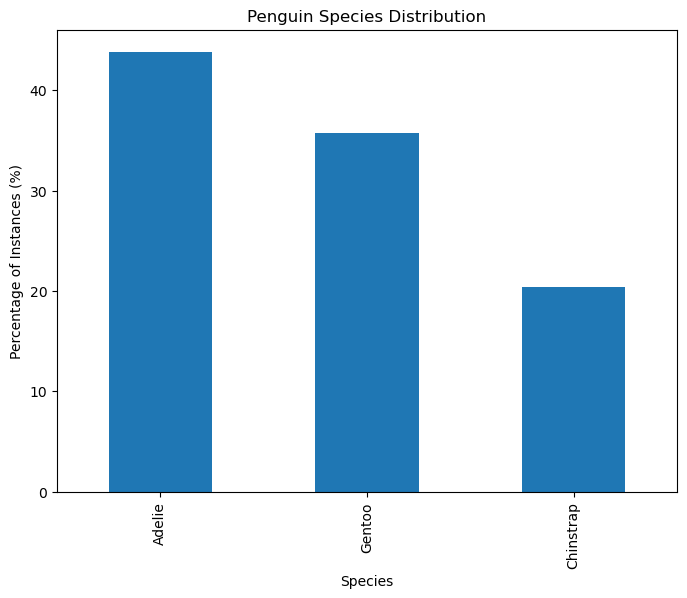

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.model_selection import GridSearchCV



# Penguin dataset
penguin_data = pd.read_csv('penguins.csv')

# (1-i) Convert 'island' and 'sex' to numerical format using OneHotEncoder for the Penguin dataset
encoder = OneHotEncoder(sparse=False)
penguin_encoded = encoder.fit_transform(penguin_data[['island', 'sex']])
penguin_encoded_df = pd.DataFrame(penguin_encoded, columns=encoder.get_feature_names_out(['island', 'sex']))

# (1-ii) Concatenate the encoded DataFrame with the original one and drop the original 'island' and 'sex' columns
penguin_data = pd.concat([penguin_data.drop(['island', 'sex'], axis=1), penguin_encoded_df], axis=1)

# Abalone dataset
abalone_data = pd.read_csv('abalone.csv')


# Plot the percentage of instances for Penguins
class_counts = penguin_data['species'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar')
plt.title('Penguin Species Distribution')
plt.xlabel('Species')
plt.ylabel('Percentage of Instances (%)')
plt.savefig('penguin-classes.gif', format='gif') 
plt.show()



ValueError: Format 'gif' is not supported (supported formats: eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp)

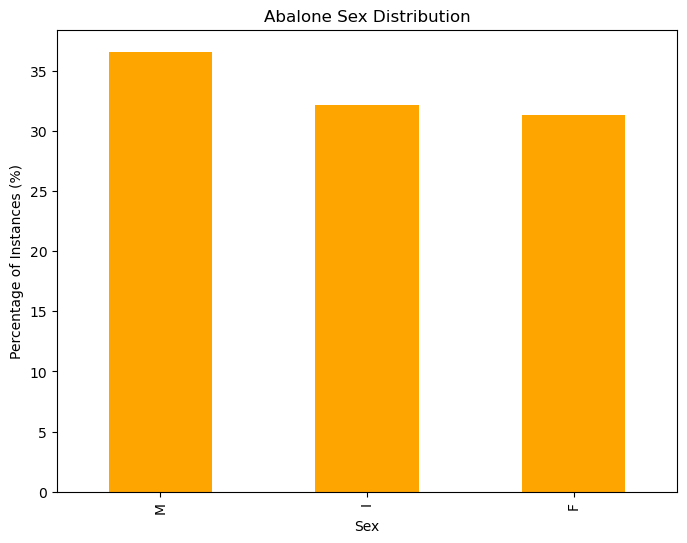

In [2]:
# Plot the percentage of instances for Abalones 
abalone_class_counts = abalone_data['Type'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 6))
abalone_class_counts.plot(kind='bar', color='orange')
plt.title('Abalone Sex Distribution')
plt.xlabel('Sex')
plt.ylabel('Percentage of Instances (%)')
plt.savefig('abalone-classes.gif', format='gif') 
plt.show()

In [3]:
## Split the datasets

#penguin
penguin_features = penguin_data.drop('species', axis=1)  # 'species'
penguin_target = penguin_data['species']
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(penguin_features, penguin_target, random_state=42)

# abalone
abalone_features = abalone_data.drop('Type', axis=1)
abalone_target = abalone_data['Type']
X_train_a, X_test_a, y_train_a, y_test_a = train_test_split(abalone_features, abalone_target, random_state=42)

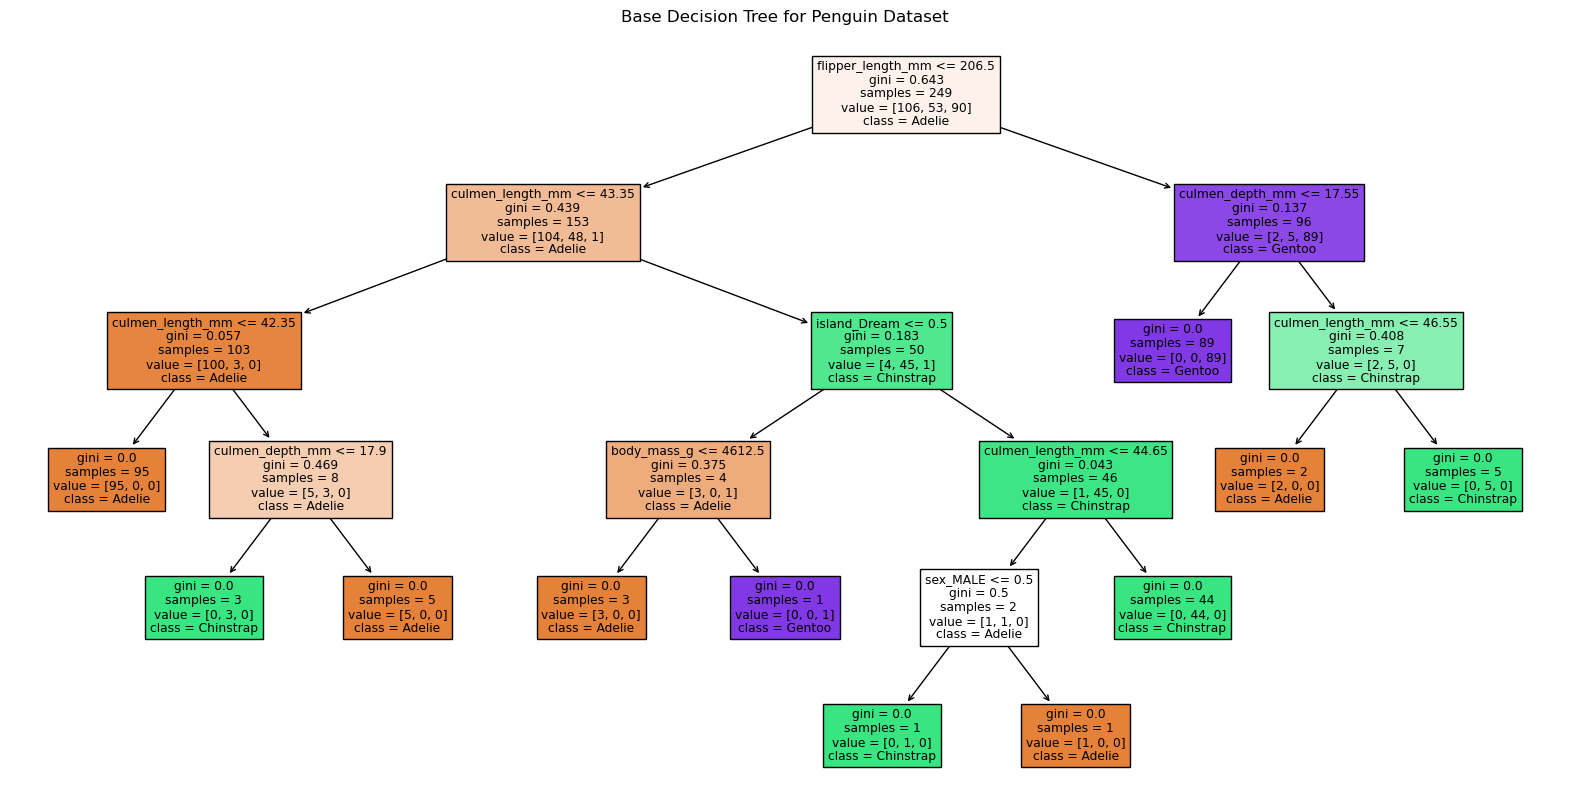

In [4]:
# Train Base-DT for the Penguin dataset with default parameters
clf_p_base = DecisionTreeClassifier(random_state=42)
clf_p_base.fit(X_train_p, y_train_p)

# Visualize the decision tree for the Penguin dataset
plt.figure(figsize=(20,10))
plot_tree(clf_p_base, filled=True, feature_names=X_train_p.columns.tolist(), class_names=np.unique(y_train_p).tolist())
plt.title('Base Decision Tree for Penguin Dataset')
plt.show()


# Check accuracy for the Penguin dataset
accuracy_p_base = clf_p_base.score(X_test_p, y_test_p)

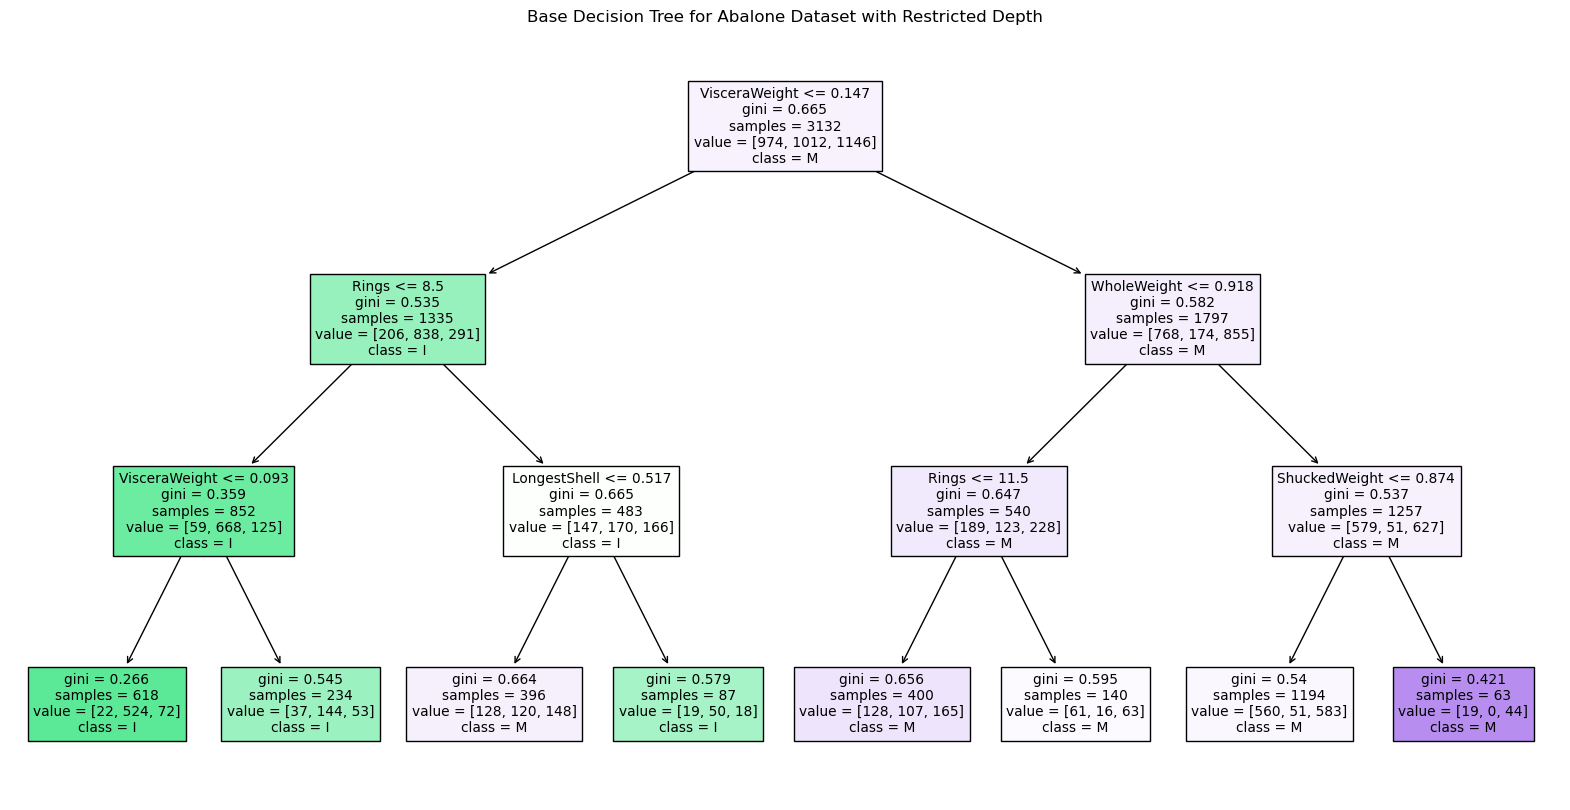

Accuracy for Base-DT with restricted depth (Abalone): 0.5253588516746411


In [6]:
# Train Base-DT for the Abalone dataset 
# max_depth=3 for visualization

clf_a_base = DecisionTreeClassifier(random_state=42, max_depth=3)
clf_a_base.fit(X_train_a, y_train_a)

# Tree
plt.figure(figsize=(20,10))
plot_tree(clf_a_base, filled=True, feature_names=X_train_a.columns.tolist(), class_names=np.unique(y_train_a).tolist())
plt.title('Base Decision Tree for Abalone Dataset with Restricted Depth')
plt.show()

# Check accuracy 
accuracy_a_base = clf_a_base.score(X_test_a, y_test_a)
print(f"Accuracy for Base-DT with restricted depth (Abalone): {accuracy_a_base}")

Penguins - Best parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2}
Penguins - Best cross-validated score: 0.9719999999999999
Abalones - Best parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}
Abalones - Best cross-validated score: 0.5319386907582636


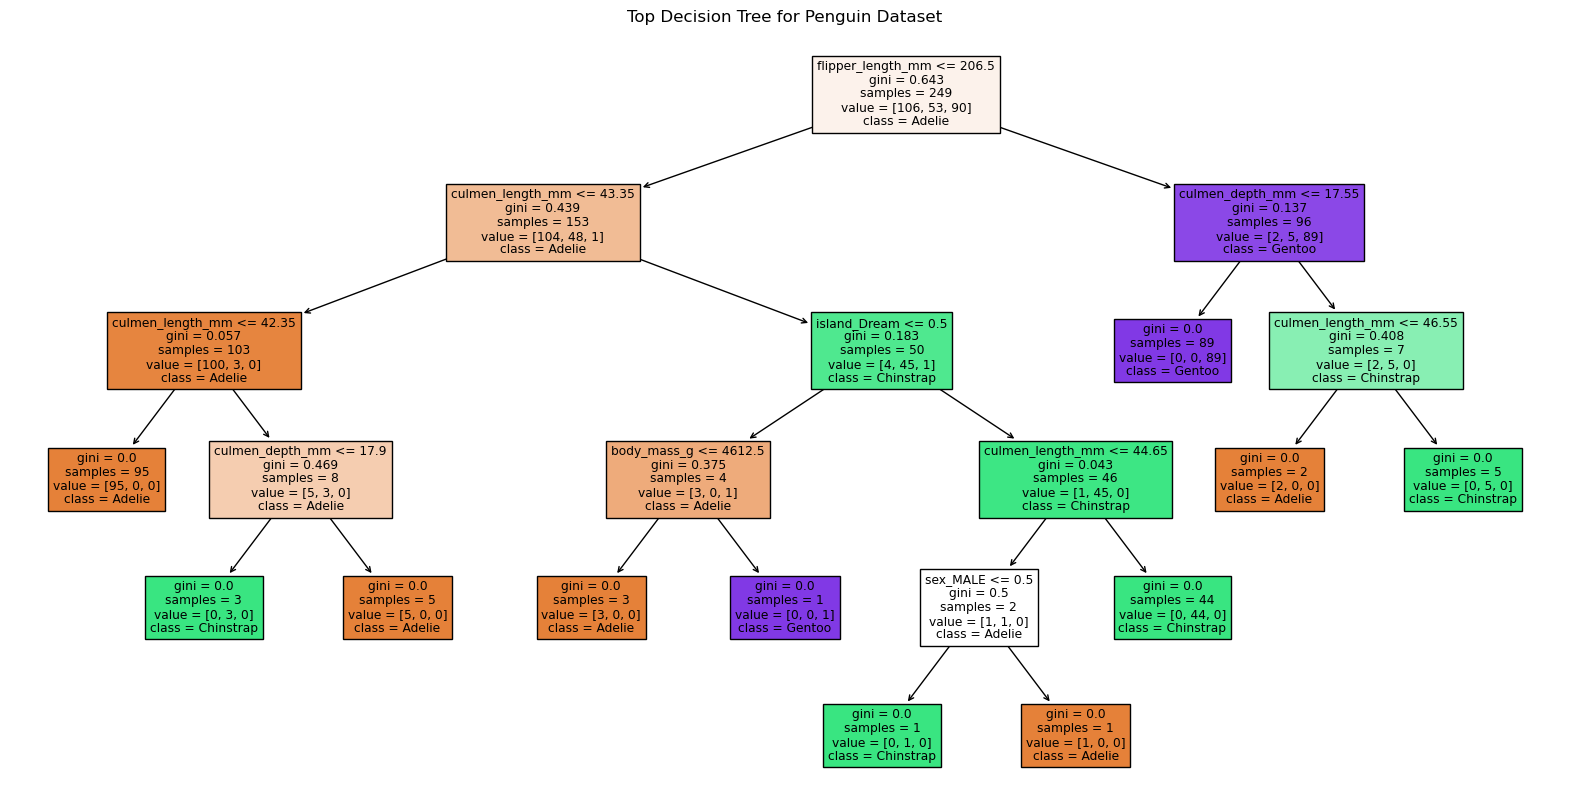

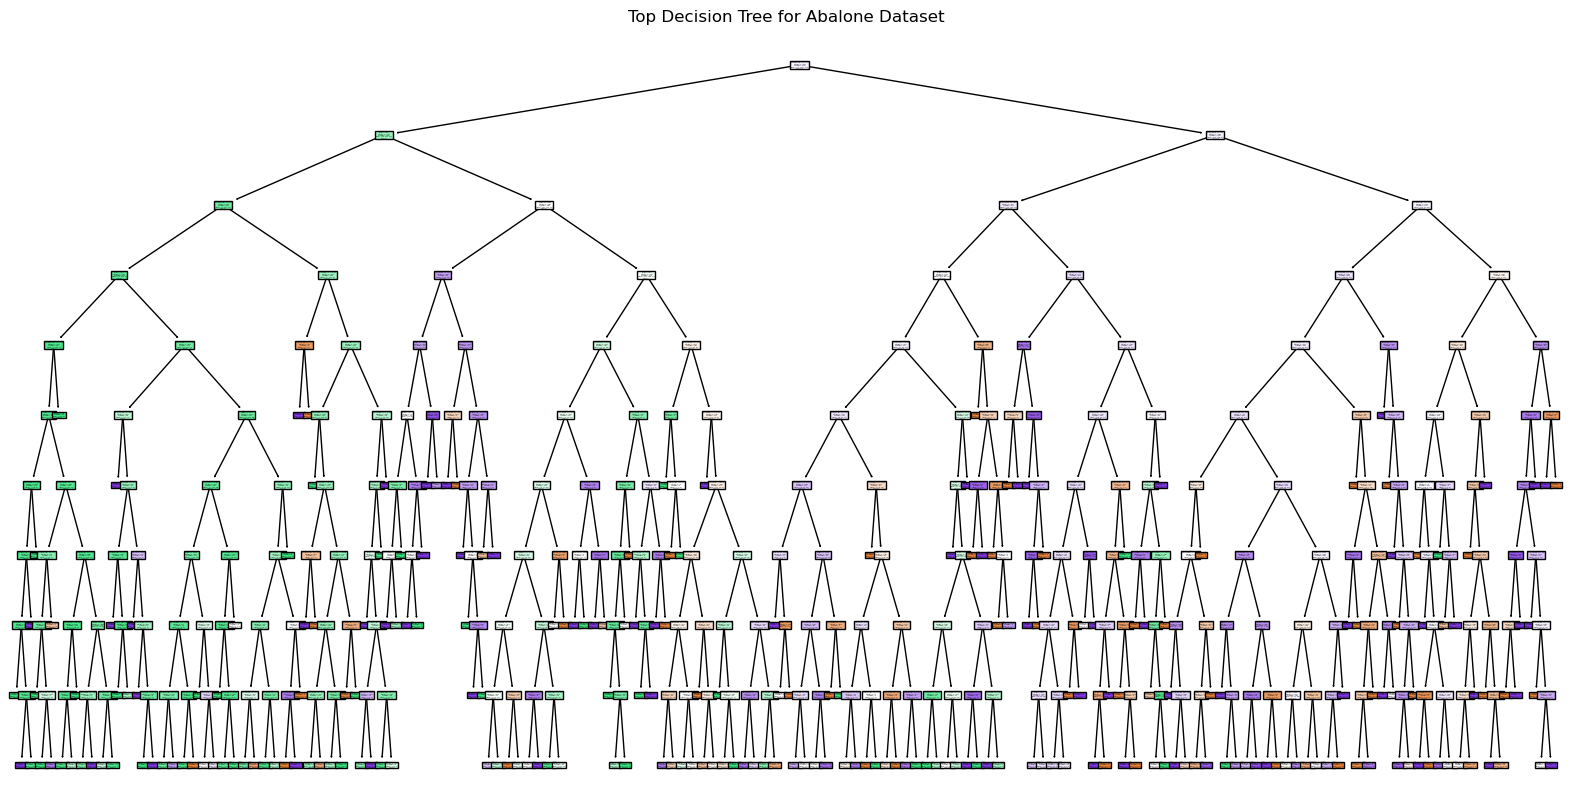

In [8]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20],  # Replaceable
    'min_samples_split': [2, 4, 6]  # Replaceable
}

# Initialize the classifier
dt = DecisionTreeClassifier(random_state=42)

# Initialize the GridSearchCV object for penguins
grid_search_p = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# grid search on the Penguin dataset
grid_search_p.fit(X_train_p, y_train_p)

# GridSearchCV object for abalones
grid_search_a = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

# grid search on the Abalone dataset
grid_search_a.fit(X_train_a, y_train_a)


print(f"Penguins - Best parameters: {grid_search_p.best_params_}")
print(f"Penguins - Best cross-validated score: {grid_search_p.best_score_}")


print(f"Abalones - Best parameters: {grid_search_a.best_params_}")
print(f"Abalones - Best cross-validated score: {grid_search_a.best_score_}")

# Retrieve the best Decision Tree models from grid_search
top_dt_penguin = grid_search_p.best_estimator_
top_dt_abalone = grid_search_a.best_estimator_

# top performing Decision Tree model for Penguins
plt.figure(figsize=(20,10))
plot_tree(top_dt_penguin, filled=True, feature_names=X_train_p.columns.tolist(), class_names=np.unique(y_train_p).tolist())
plt.title('Top Decision Tree for Penguin Dataset')
plt.show()

# top performing Decision Tree model for Abalones
plt.figure(figsize=(20,10))
plot_tree(top_dt_abalone, filled=True, feature_names=X_train_a.columns.tolist(), class_names=np.unique(y_train_a).tolist())
plt.title('Top Decision Tree for Abalone Dataset')
plt.show()

Original Best Parameters for Abalone: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 4}


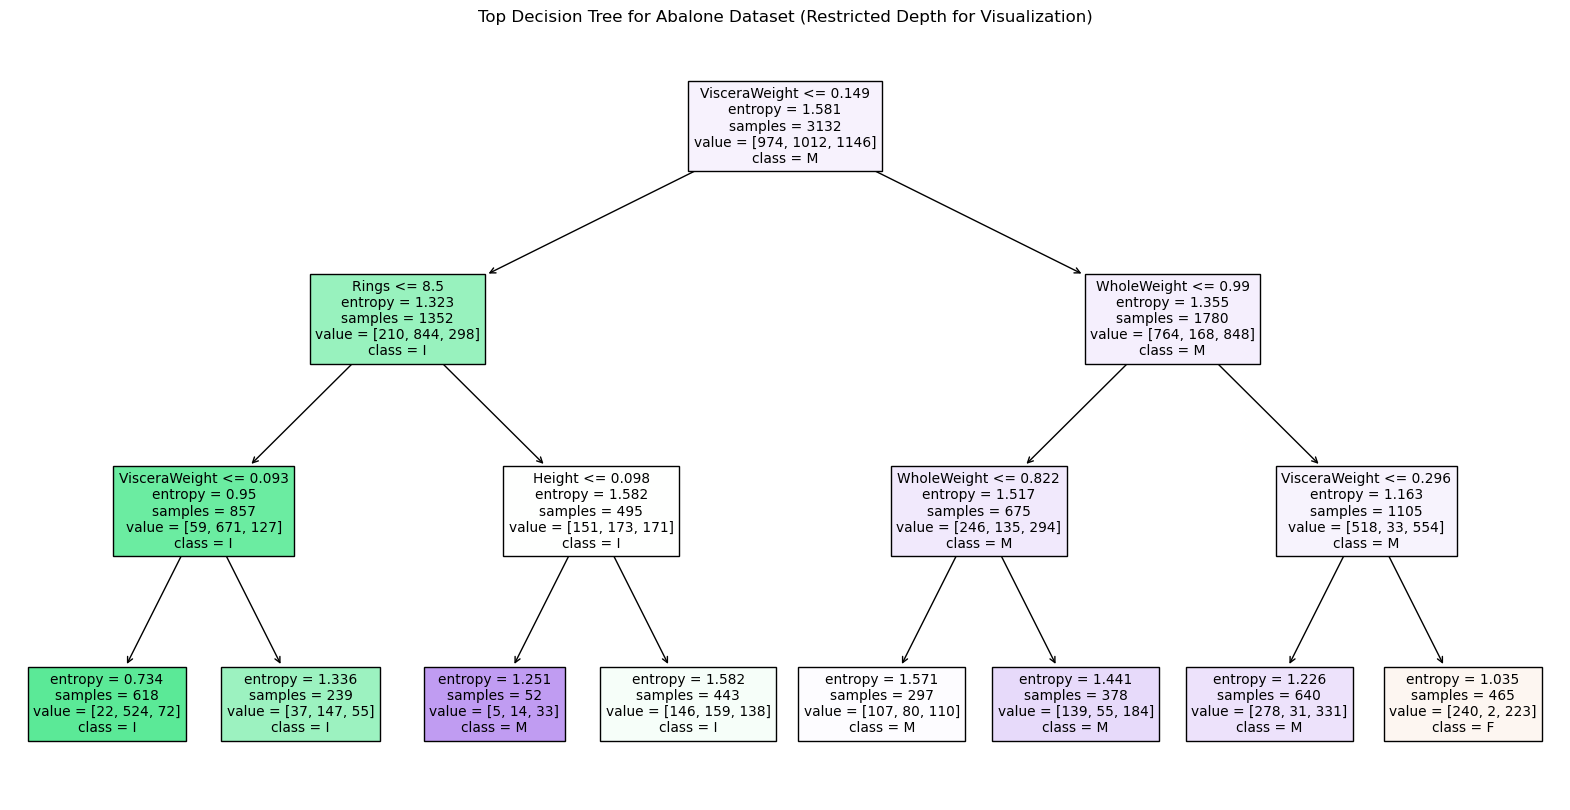

In [9]:
# for the abalone dataset (restricted tree depth)

# Retrieve the best parameters for the Abalone dataset and override the max_depth
best_params_abalone = grid_search_a.best_params_
print(f"Original Best Parameters for Abalone: {best_params_abalone}")

# max depth =3 (Changeable)
visualization_max_depth = 3  
best_params_abalone['max_depth'] = visualization_max_depth

# Train a new Decision Tree
top_dt_abalone_visual = DecisionTreeClassifier(**best_params_abalone, random_state=42)
top_dt_abalone_visual.fit(X_train_a, y_train_a)

# restricted depth for Abalone
plt.figure(figsize=(20,10))
plot_tree(top_dt_abalone_visual, filled=True, feature_names=X_train_a.columns.tolist(), class_names=np.unique(y_train_a).tolist())
plt.title('Top Decision Tree for Abalone Dataset (Restricted Depth for Visualization)')
plt.show()